In [2]:
import pandas as pd
import numpy as np

Loading dataset

In [3]:
df_rating = pd.read_csv(r'archive (2)\rating.csv')
df_anime = pd.read_csv(r'archive (2)\anime.csv')

EDA

In [4]:
df_rating.head(10)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
5,1,355,-1
6,1,356,-1
7,1,442,-1
8,1,487,-1
9,1,846,-1


In [5]:
df_anime.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


In [6]:
df_rating.shape
df_rating.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [7]:
print(df_anime.shape)

for i in df_anime.columns:
    print (f" Number of unique {i} are: {df_anime[i].nunique()}")

print("Missing values in dataset: ")
print(df_anime.isna().sum())

(12294, 7)
 Number of unique anime_id are: 12294
 Number of unique name are: 12292
 Number of unique genre are: 3264
 Number of unique type are: 6
 Number of unique episodes are: 187
 Number of unique rating are: 598
 Number of unique members are: 6706
Missing values in dataset: 
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


Anime data


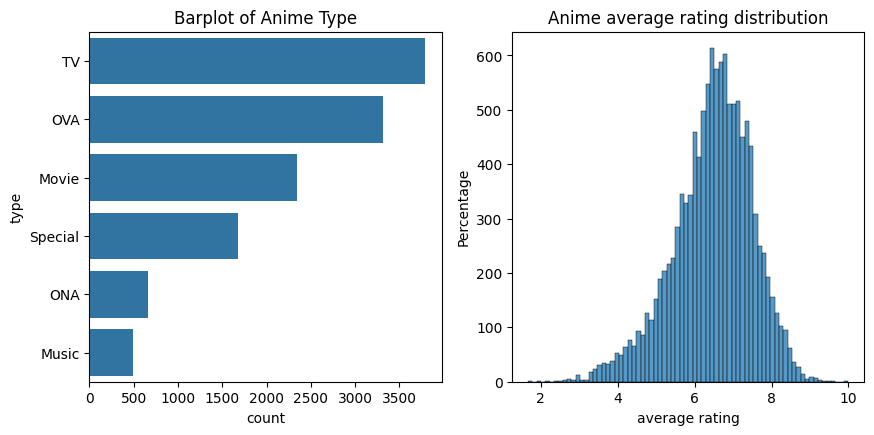

In [80]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)

sns.countplot(y='type',data=df_anime,orient='h',order=list(df_anime.type.value_counts().index))
plt.title('Barplot of Anime Type')

plt.subplot(2,2,2)
sns.histplot(df_anime['rating'].dropna())
plt.title('Anime average rating distribution')
plt.xlabel('average rating')
plt.ylabel('Percentage')
plt.show()

Conclusions:
TV and OVA aree the most popular anime types as seen in the barplot.
Majority of anime have rating around 7. the distribution is a bit skewed to the left. mean & median rating both about 6.5 as shown in the histogram.

In [81]:
#sumamry of averager rating of animes
df_anime['rating'].dropna().describe()

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64

In [8]:
no_rating = df_rating[df_rating['rating'] == -1]

In [9]:
print( f"Number of observations are : {len(no_rating)}")
for i in no_rating.columns:
    print (f" Number of unique {i} are: {no_rating[i].nunique()}")

ratings = (df_rating[df_rating['rating'] != -1])
for i in ratings.columns:
    print (f" Number of unique {i} are: {ratings[i].nunique()}")
print( f"Number of observations are : {len(ratings)}")

print(f" Rating scale: {np.sort(ratings['rating'].unique())}")
print(f" Density: {len(ratings)/(ratings.nunique()[0]*ratings.nunique()[1])}")

ratings.head(10)

Number of observations are : 1476496
 Number of unique user_id are: 37128
 Number of unique anime_id are: 10697
 Number of unique rating are: 1
 Number of unique user_id are: 69600
 Number of unique anime_id are: 9927
 Number of unique rating are: 10
Number of observations are : 6337241
 Rating scale: [ 1  2  3  4  5  6  7  8  9 10]


C:\Users\diyas\AppData\Local\Temp\ipykernel_15252\1426458474.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f" Density: {len(ratings)/(ratings.nunique()[0]*ratings.nunique()[1])}")


 Density: 0.00917218829640282


,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10
156,3,20,8
157,3,154,6
158,3,170,9
159,3,199,10
160,3,225,9


In [10]:
ratings.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

Density being 0.009 shows that the matrix is very sparsy

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns

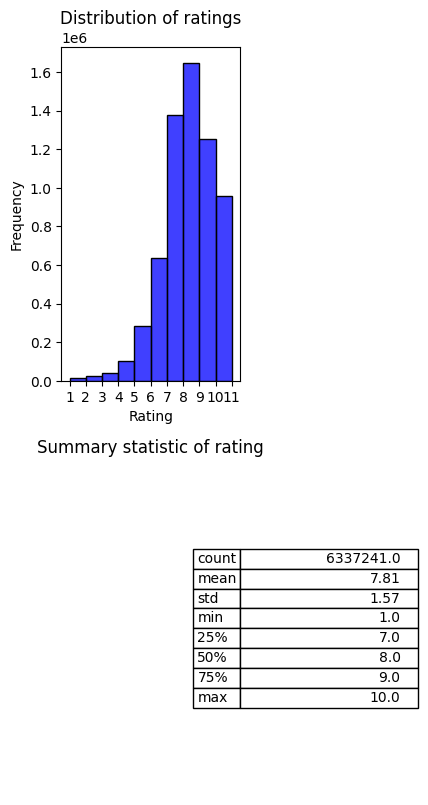

In [78]:
rat_df=pd.DataFrame(ratings.rating.describe().apply(lambda x : round(x,2)))

plt.figure(figsize=(7,8))
plt.subplot(2,2,1)
sns.histplot(ratings['rating'], kde=False, bins=list(range(1, 12)), color='blue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title("Distribution of ratings")
plt.xticks(range(1,12))

plt.subplot(2,2,3)
plt.table(cellText = rat_df.values,rowLabels=rat_df.index,loc='right')
plt.title("Summary statistic of rating")
plt.axis('off')
plt.tight_layout()
plt.show()

In [13]:
user_rating_times = ratings.groupby('user_id')['rating'].count()
user_rating_df = pd.DataFrame(user_rating_times.describe())

print(user_rating_times.head(5))
user_rating_df

user_id
1      4
2      1
3     92
5    459
7    343
Name: rating, dtype: int64


,rating
count,69600.000000
mean,91.052313
std,135.764253
min,1.000000
25%,13.000000
50%,45.000000
75%,114.000000
max,3747.000000


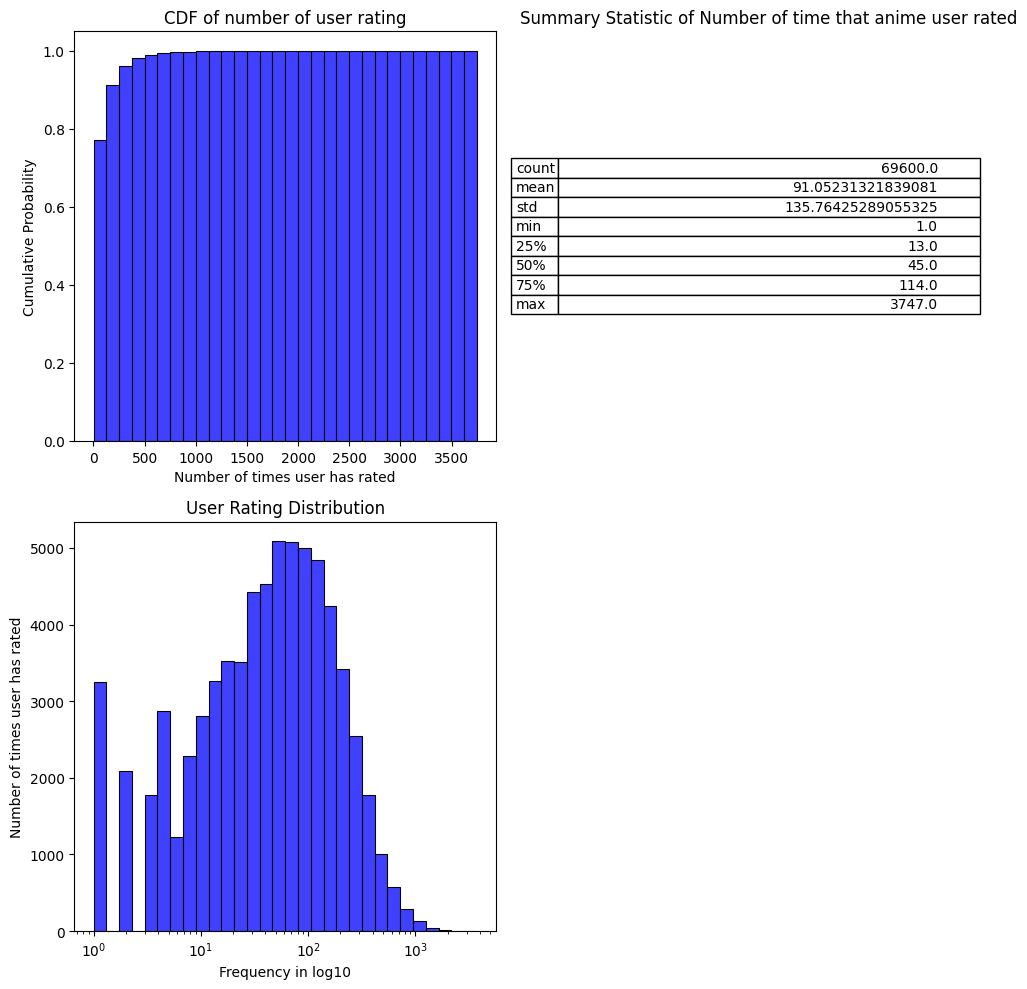

In [14]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(
    user_rating_times,
    kde=False,
    cumulative=True,
    stat="density",  
    bins=30,
    color="blue",
)
plt.title('CDF of number of user rating' , fontsize=12)
plt.ylabel('Cumulative Probability')
plt.xlabel('Number of times user has rated')

plt.subplot(2,2,2)
plt.table(cellText = user_rating_df.values,rowLabels=user_rating_df.index,loc='center')
plt.title('Summary Statistic of Number of time that anime user rated',fontsize=12)
plt.axis('off')


plt.subplot(2,2,3)       
sns.histplot(user_rating_times, kde=False, log_scale=True, bins=30, color='blue', edgecolor='black')
plt.title('User Rating Distribution',fontsize=12)
plt.ylabel('Number of times user has rated')
plt.xlabel('Frequency in log10')
plt.tight_layout()

plt.show()

In [15]:
anime_rating_times = ratings.groupby('anime_id')['rating'].count() #1D array
anime_rating_df = pd.DataFrame(anime_rating_times.describe())
anime_rating_df

,rating
count,9927.000000
mean,638.384305
std,1795.865541
min,1.000000
25%,9.000000
50%,57.000000
75%,395.000000
max,34226.000000


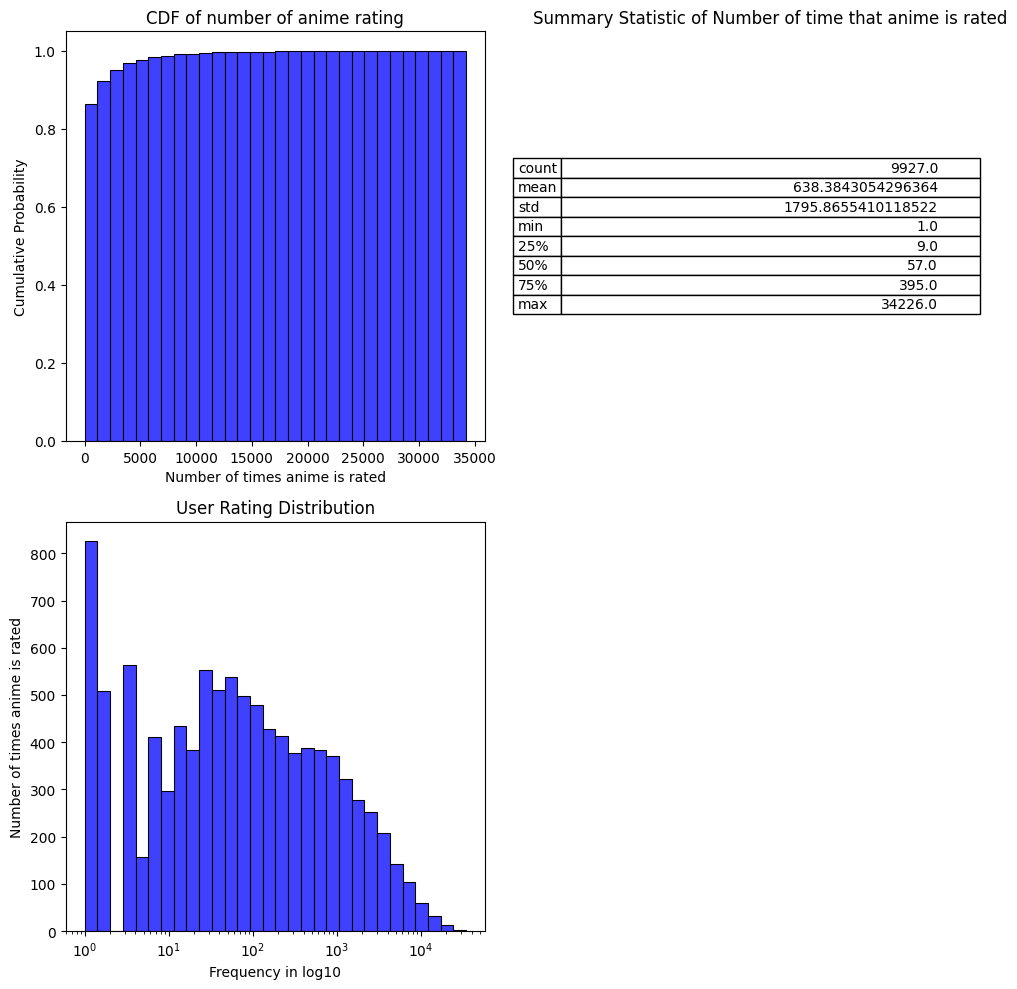

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(
    anime_rating_times,
    kde=False,
    cumulative=True,
    stat="density",  
    bins=30,
    color="blue",
)
plt.title('CDF of number of anime rating' , fontsize=12)
plt.ylabel('Cumulative Probability')
plt.xlabel('Number of times anime is rated')

plt.subplot(2,2,2)
plt.table(cellText = anime_rating_df.values,rowLabels=anime_rating_df.index,loc='center')
plt.title('Summary Statistic of Number of time that anime is rated',fontsize=12)
plt.axis('off')


plt.subplot(2,2,3)       
sns.histplot(anime_rating_times, kde=False, log_scale=True, bins=30, color='blue', edgecolor='black')
plt.title('User Rating Distribution',fontsize=12)
plt.ylabel('Number of times anime is rated')
plt.xlabel('Frequency in log10')
plt.tight_layout()

plt.show()

In [17]:
anime_dist = ratings.groupby('anime_id')['rating'].count().sort_values(ascending=False)
anime_dist_df = pd.DataFrame(anime_dist)
anime_dist_df.columns = ['count']

a_name = df_anime.iloc[:,0:2].set_index('anime_id')
a_merged = a_name.join(anime_dist_df,how='inner')

#Top five
top_five = a_merged.sort_values('count',ascending=False).head(5)
print(top_five)

                                     name  count
anime_id                                        
1535                           Death Note  34226
11757                    Sword Art Online  26310
16498                  Shingeki no Kyojin  25290
1575      Code Geass: Hangyaku no Lelouch  24126
6547                         Angel Beats!  23565


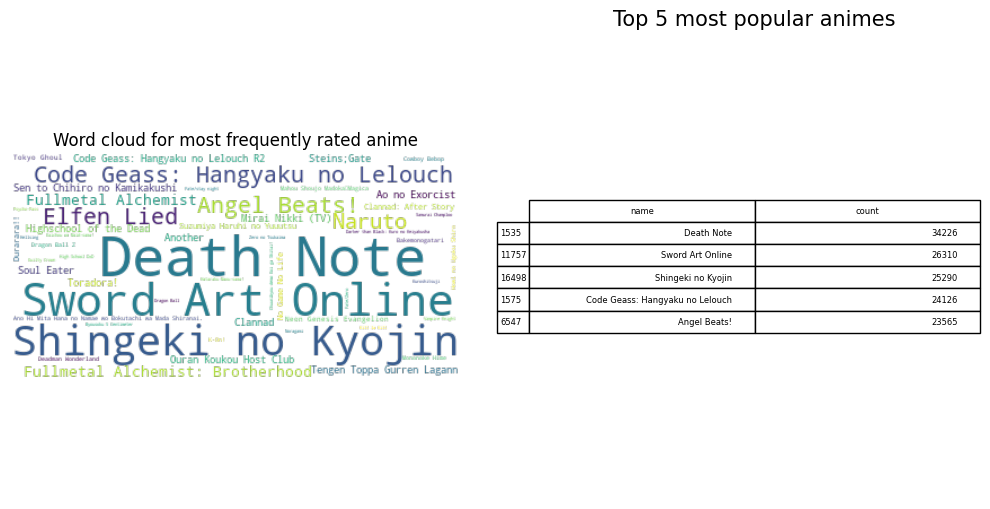

In [18]:
from wordcloud import WordCloud
a_dic = dict(zip(a_merged['name'], a_merged['count']))

wordCloud = WordCloud(mode='RGBA',background_color=None)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Word cloud for most frequently rated anime")
name_a = wordCloud.generate_from_frequencies(a_dic)
plt.imshow(name_a,interpolation='bilinear')

plt.axis('off')

plt.subplot(2,2,2)
plt.table(cellText=top_five.values,rowLabels=top_five.index,colLabels=top_five.columns,loc='center')
plt.title('Top 5 most popular animes',fontsize=15)
plt.axis('off')
              
plt.tight_layout()

plt.show()

The top five anime are:
Death Note,
Sword Art Online,
Shingeki no Kyojin,
Code Geass: Hangyaku no Lelouch,
Angel Beats! as seen from wordcloud

In [22]:
one_rating = ratings.groupby('user_id').filter(lambda x: x['rating'].nunique()==1)
one_rating_r = one_rating.groupby('user_id')['rating'].agg(['count','mean'])

In [24]:
print(f'About {round(one_rating.user_id.nunique()/ratings.user_id.nunique()*100,2)}% ({one_rating.user_id.nunique()}) of users only use one rating scale')

About 7.87% (5476) of users only use one rating scale


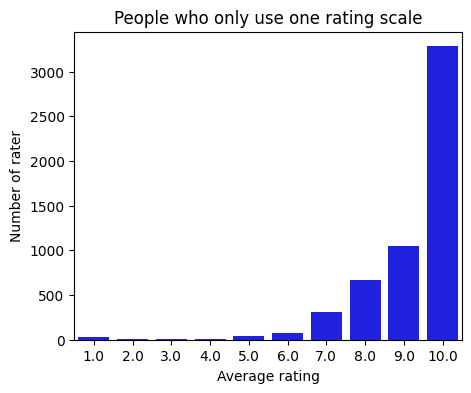

In [27]:
plt.figure(figsize=(5,4))
plt.title('People who only use one rating scale')
sns.countplot(x='mean',data = one_rating_r,color='blue')
plt.xlabel('Average rating')
plt.ylabel('Number of rater')
plt.show()

More than 3000 people who use one rating scale give 10

In [29]:
avg_r = ratings.groupby('user_id')['rating'].mean()
#highest avg score
ten_r = avg_r[avg_r==10]
ten_df = pd.DataFrame(ten_r).reset_index()
#lowest avg score
one_r = avg_r[avg_r==1]
one_df = pd.DataFrame(one_r).reset_index()

In [39]:
#people who give ratings can give lowest and highest rating
user_rating_times_df =  pd.DataFrame(user_rating_times).reset_index()
user_rating_times_df.columns = ['user_id','count']
user_rating_times_df
ten_user_count = pd.merge(user_rating_times_df,ten_df,on='user_id').sort_values('count',ascending=False)
one_user_count = pd.merge(user_rating_times_df,one_df,on='user_id').sort_values('count',ascending=False)
ten_user_count

,user_id,count,rating
2057,45649,746,10.0
1386,31005,565,10.0
1418,31540,465,10.0
1355,30062,463,10.0
935,20389,430,10.0
...,...,...,...
3262,73192,1,10.0
3263,73207,1,10.0
1,2,1,10.0
3280,73514,1,10.0


In [41]:
print(f'Number of User who only give the lowest rating in user dataset: {one_r.count()}')
print(f'Number of User who only give perfect rating in user dataset: {ten_r.count()}')

Number of User who only give the lowest rating in user dataset: 27
Number of User who only give perfect rating in user dataset: 3281


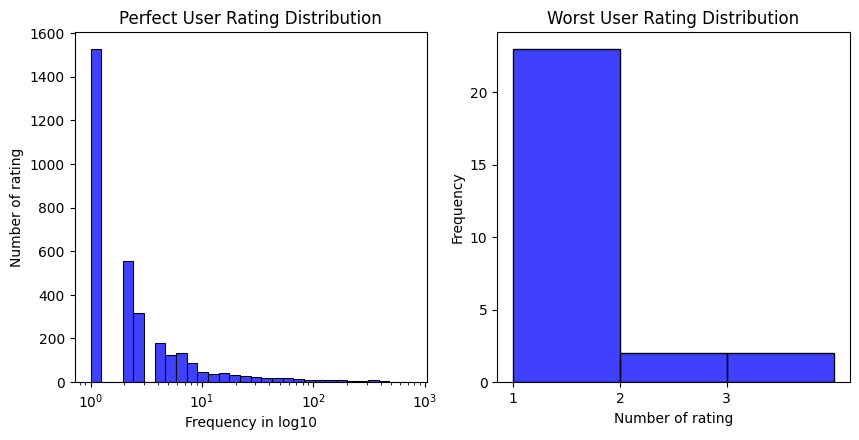

In [52]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.histplot(ten_user_count['count'], kde=False, log_scale=True, bins=30, color='blue', edgecolor='black')
plt.title('Perfect User Rating Distribution')
plt.ylabel('Number of rating')
plt.xlabel('Frequency in log10')

plt.subplot(2,2,2)
sns.histplot(
    data=one_user_count['count'], 
    bins=[1, 2, 3, 4],  
    kde=False,         
    stat='count',
    color='blue'
)
plt.title('Worst User Rating Distribution')
plt.ylabel('Frequency')
plt.xlabel('Number of rating')
plt.xticks((1,2,3))
plt.show()

In [55]:
avg_a = ratings.groupby('anime_id')['rating'].mean()
ten_a = avg_a[avg_a==10]
ten_a_df = pd.DataFrame(ten_a).reset_index()
one_a = avg_a[avg_a==1]
one_a_df = pd.DataFrame(one_a).reset_index()


In [56]:
perfect_anime=pd.merge(ten_a_df, df_anime, on='anime_id',suffixes=['_user_table' , '_anime_table'])
perfect_anime_count=pd.merge(perfect_anime,anime_dist_df.reset_index(),on='anime_id')
lowest_anime=pd.merge(one_a_df, df_anime, on='anime_id',suffixes=['_user_table' , '_anime_table'])
lowest_anime_count=pd.merge(lowest_anime,anime_dist_df.reset_index(),on='anime_id')

In [58]:
print(f'Number of item that only get perfect rating in user dataset: {ten_a.count()}')
print(f'Number of item that only get the lowest rating in user dataset: {one_a.count()}')

Number of item that only get perfect rating in user dataset: 35
Number of item that only get the lowest rating in user dataset: 34


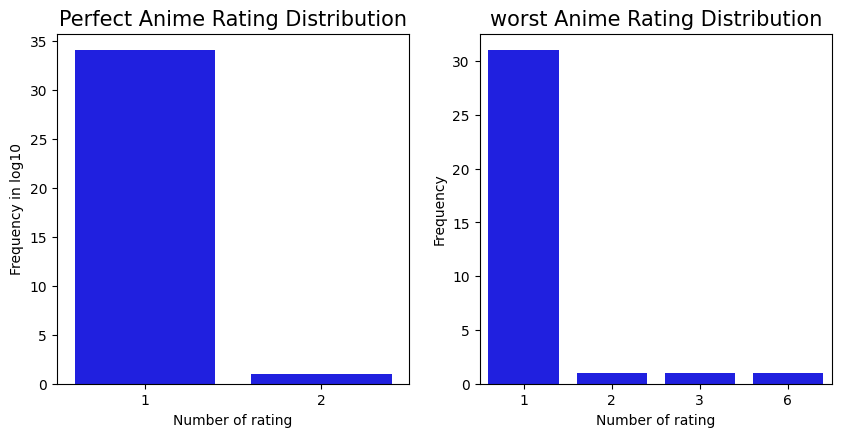

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)

sns.countplot(data=perfect_anime_count,x='count',color='b')
plt.title('Perfect Anime Rating Distribution',fontsize=15)
plt.ylabel('Frequency in log10')
plt.xlabel('Number of rating')

plt.subplot(2,2,2)

sns.countplot(x='count',data=lowest_anime_count,color='b')
plt.title('worst Anime Rating Distribution',fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Number of rating')

plt.show()

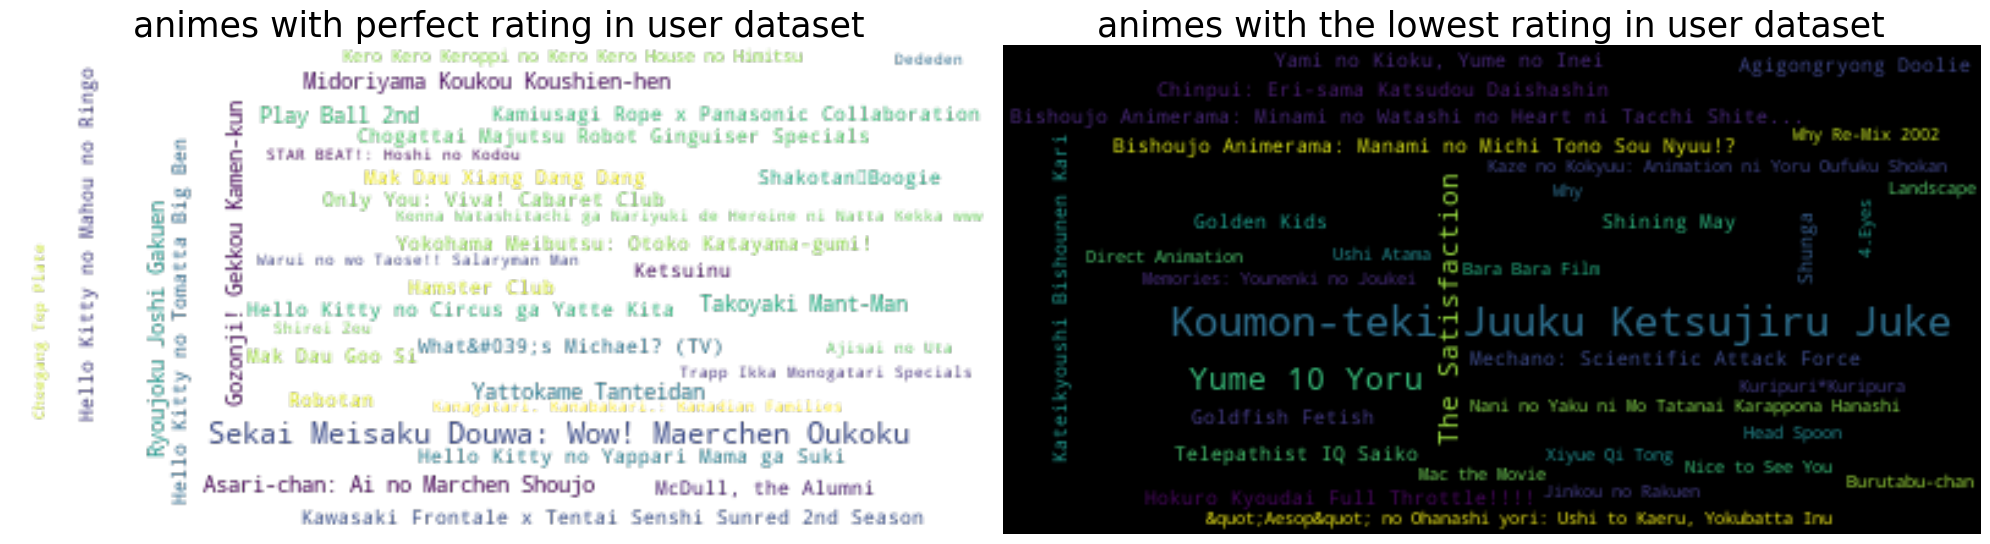

In [61]:
perfect_dic = dict(zip(perfect_anime_count['name'],perfect_anime_count['count']))
lowest_dic = dict(zip(lowest_anime_count['name'],lowest_anime_count['count']))
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
wordcloud = WordCloud(mode='RGBA',background_color=None)
perfect_im = wordcloud.generate_from_frequencies(perfect_dic)
plt.imshow(perfect_im,interpolation="bilinear")
plt.title('animes with perfect rating in user dataset',fontsize=25)
plt.axis('off')


plt.subplot(2,2,2)
wordcloud = WordCloud(max_words=200)
lowest_im = wordcloud.generate_from_frequencies(lowest_dic)
plt.imshow(lowest_im,interpolation="bilinear")

plt.title('animes with the lowest rating in user dataset',fontsize=25)

plt.axis('off')

plt.tight_layout()

plt.show()

In [62]:
#Not dropping rating == -1
user_df = df_rating.groupby('user_id')
user_df

In [65]:
#people either like it or hate it, complete opposite behavior
U_1_scale_like_dis=user_df.filter(lambda x: -1 in x['rating'].values and x['rating'].nunique()==2)
#people who only watch
only_watch = user_df.filter(lambda x: x['rating'].max() == -1)

In [66]:
#sum
U_1_scale_sum=U_1_scale_like_dis[U_1_scale_like_dis['rating']!=-1].groupby('user_id')['rating'].agg(['count','mean'])

In [67]:
print('##  Summay of User table including rating = -1 ##\n')
print(f'{U_1_scale_like_dis.user_id.nunique()} Users who show opposite behavior (like/dislike) for rated Anime while not rating others they watch')
print(f'{only_watch.user_id.nunique()} Users who only watch but never rate any Anime')

##  Summay of User table including rating = -1 ##

2153 Users who show opposite behavior (like/dislike) for rated Anime while not rating others they watch
3915 Users who only watch but never rate any Anime


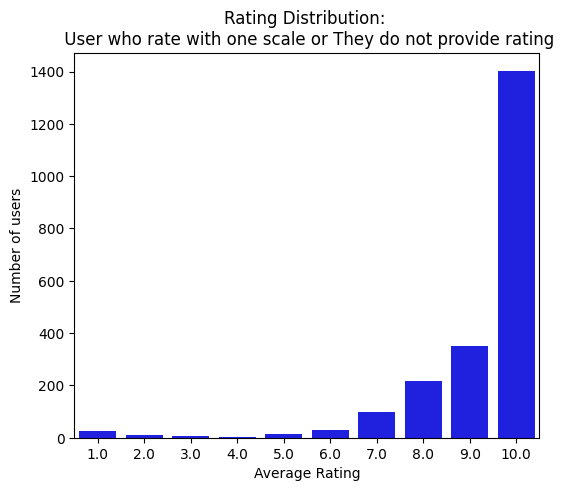

In [70]:
plt.figure(figsize=(6,5))

sns.countplot(x='mean', data=U_1_scale_sum,color='b')
plt.title('Rating Distribution: \n User who rate with one scale or They do not provide rating')
plt.ylabel('Number of users')
plt.xlabel('Average Rating')
plt.show()

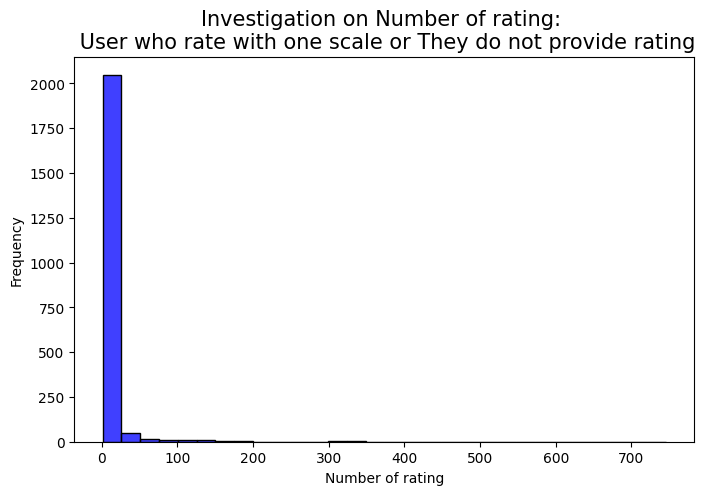

In [75]:
plt.figure(figsize=(8,5))
sns.histplot(U_1_scale_sum['count'],kde=False,color='blue',stat='count',bins=30)
plt.title('Investigation on Number of rating: \n User who rate with one scale or They do not provide rating',fontsize=15)
plt.ylabel('Frequency')
plt.xlabel('Number of rating')
plt.show()

Investigation on genre

In [91]:
# get total count of each individual genre
genre_count=df_anime.genre.str.get_dummies(sep=', ').sum().sort_values(ascending=False) 
genre_count_df = pd.DataFrame({'genre': genre_count.index, 'count': genre_count.values})

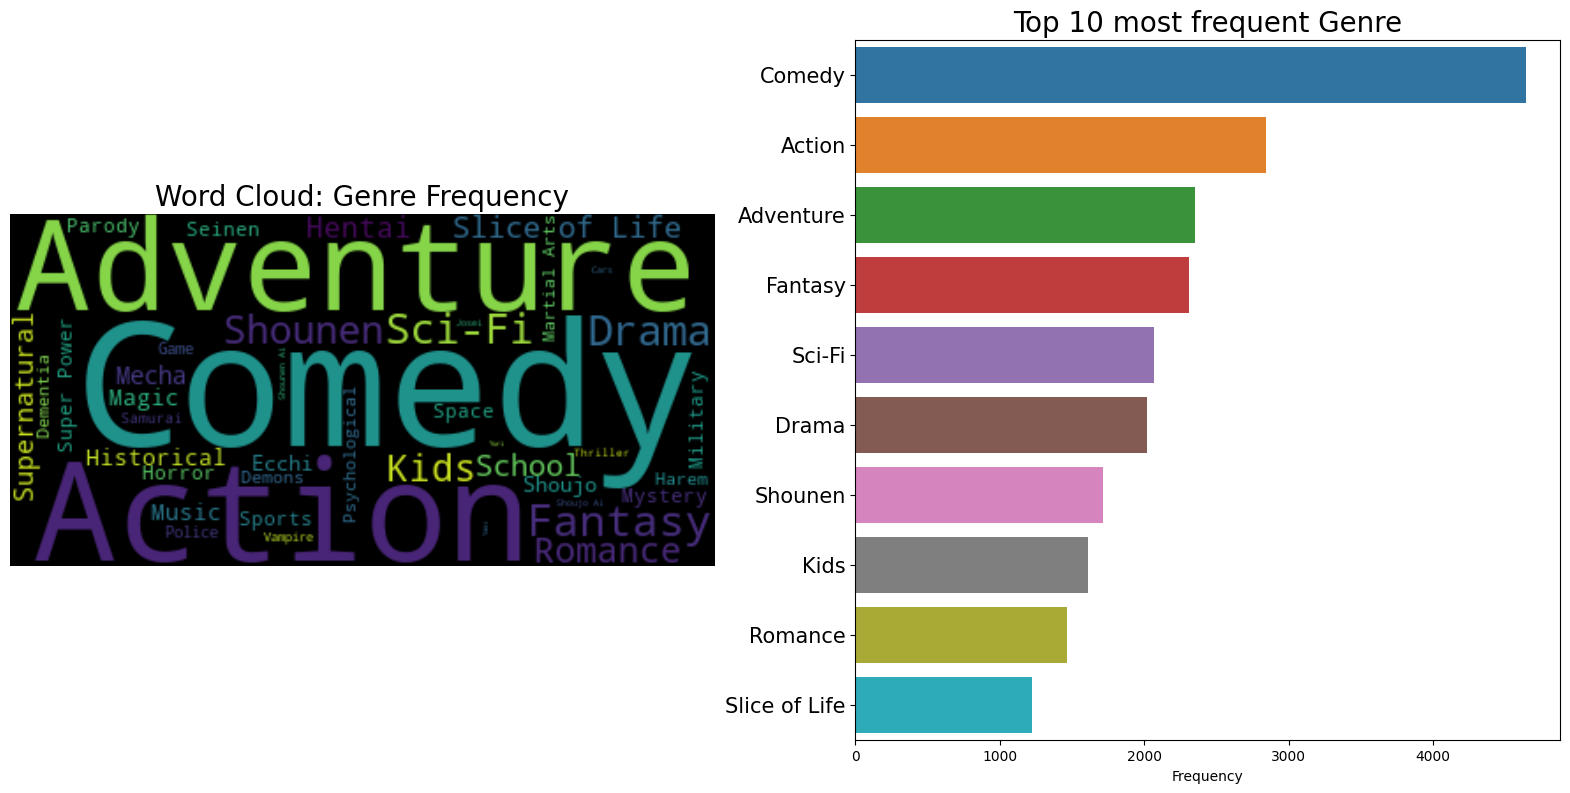

In [90]:
# get genre frequecny dict for word cloud
genre_dic = dict(zip(genre_count_df['genre'],genre_count_df['count']))


## create & plot wordCloud for Genre_count to visualize top genre ##
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=genre_dic) #create image of genre_dic


plt.figure(figsize=(20,20))
plt.subplot(2,2,1)

plt.imshow(wordcloud,interpolation="bilinear" ) #bilinear for smoothing out
plt.title('Word Cloud: Genre Frequency',fontsize=20)
plt.axis('off')

plt.subplot(2,2,2)
sns.barplot(data=pd.DataFrame(genre_count).head(10).T,orient='h')
plt.title('Top 10 most frequent Genre',fontsize=20)
plt.xlabel('Frequency')
plt.yticks(fontsize=15)

plt.show()

Based on the wordcloud & barplot, the top 5 anime genres are Comedy, Action,Adventure,Fantasy, and Sci-Fi